# Visualization - Tags

What were the most common tags in each topic that authors chose to use for their articles?

### Top 10 Tags in Technology 
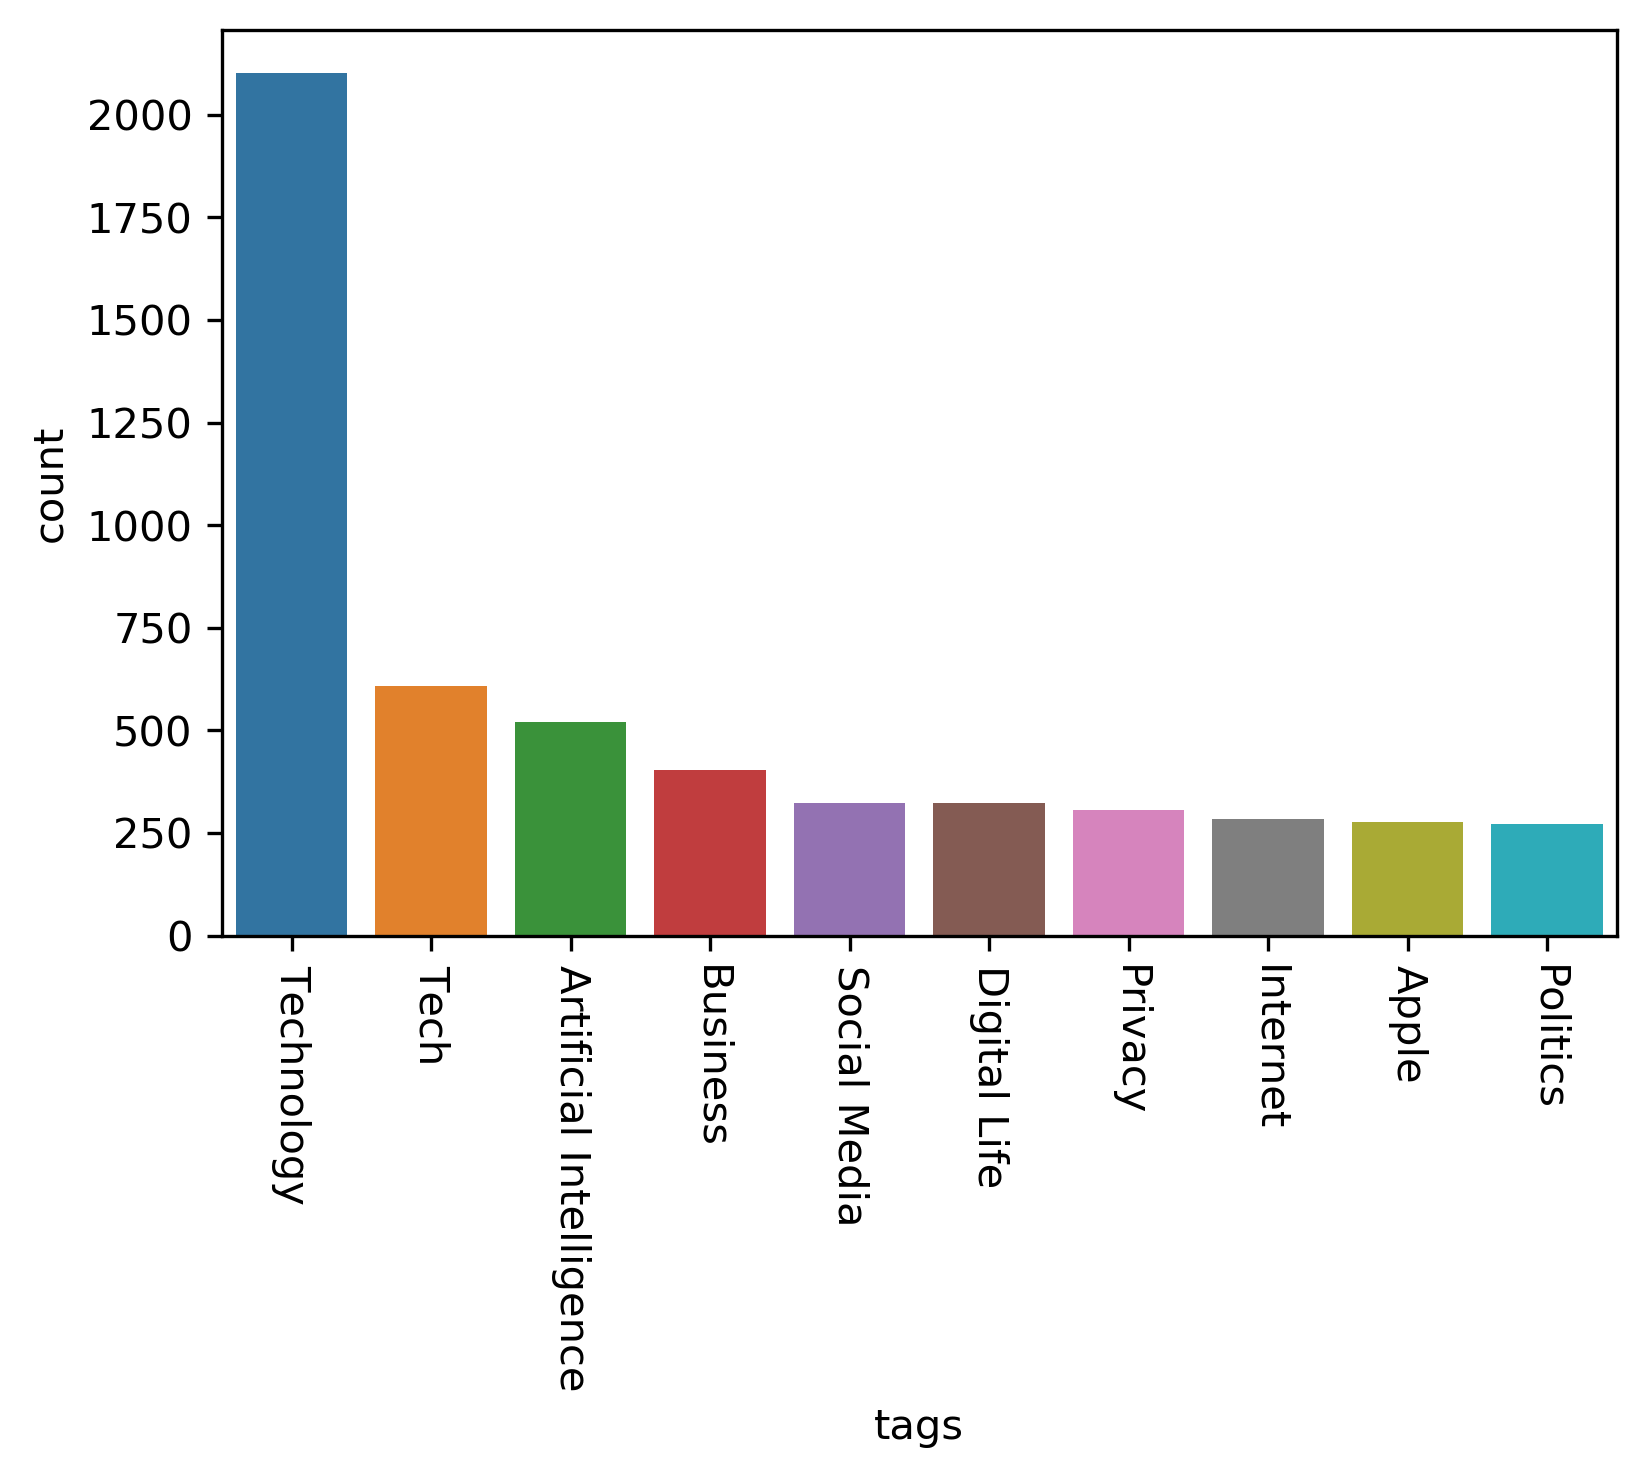

### Top 10 Tags in Money
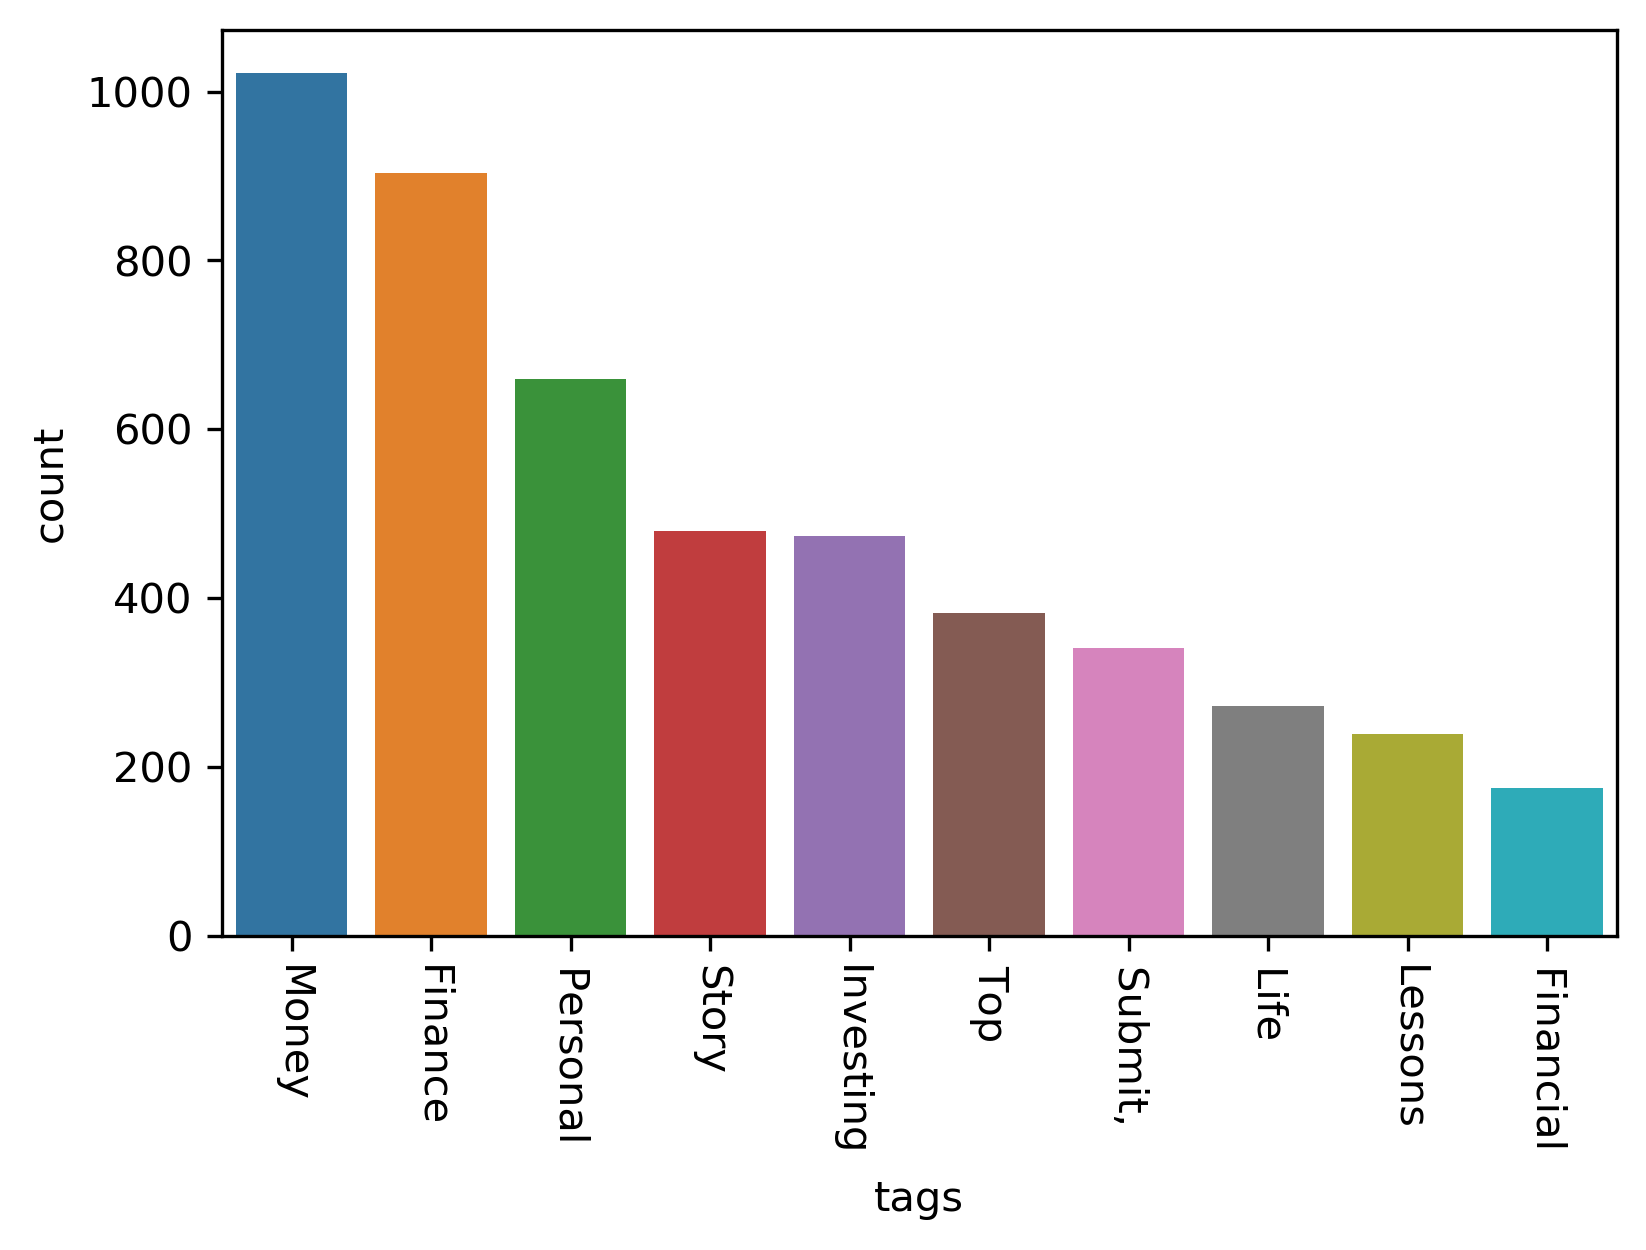

### Top 10 Tags in Politics
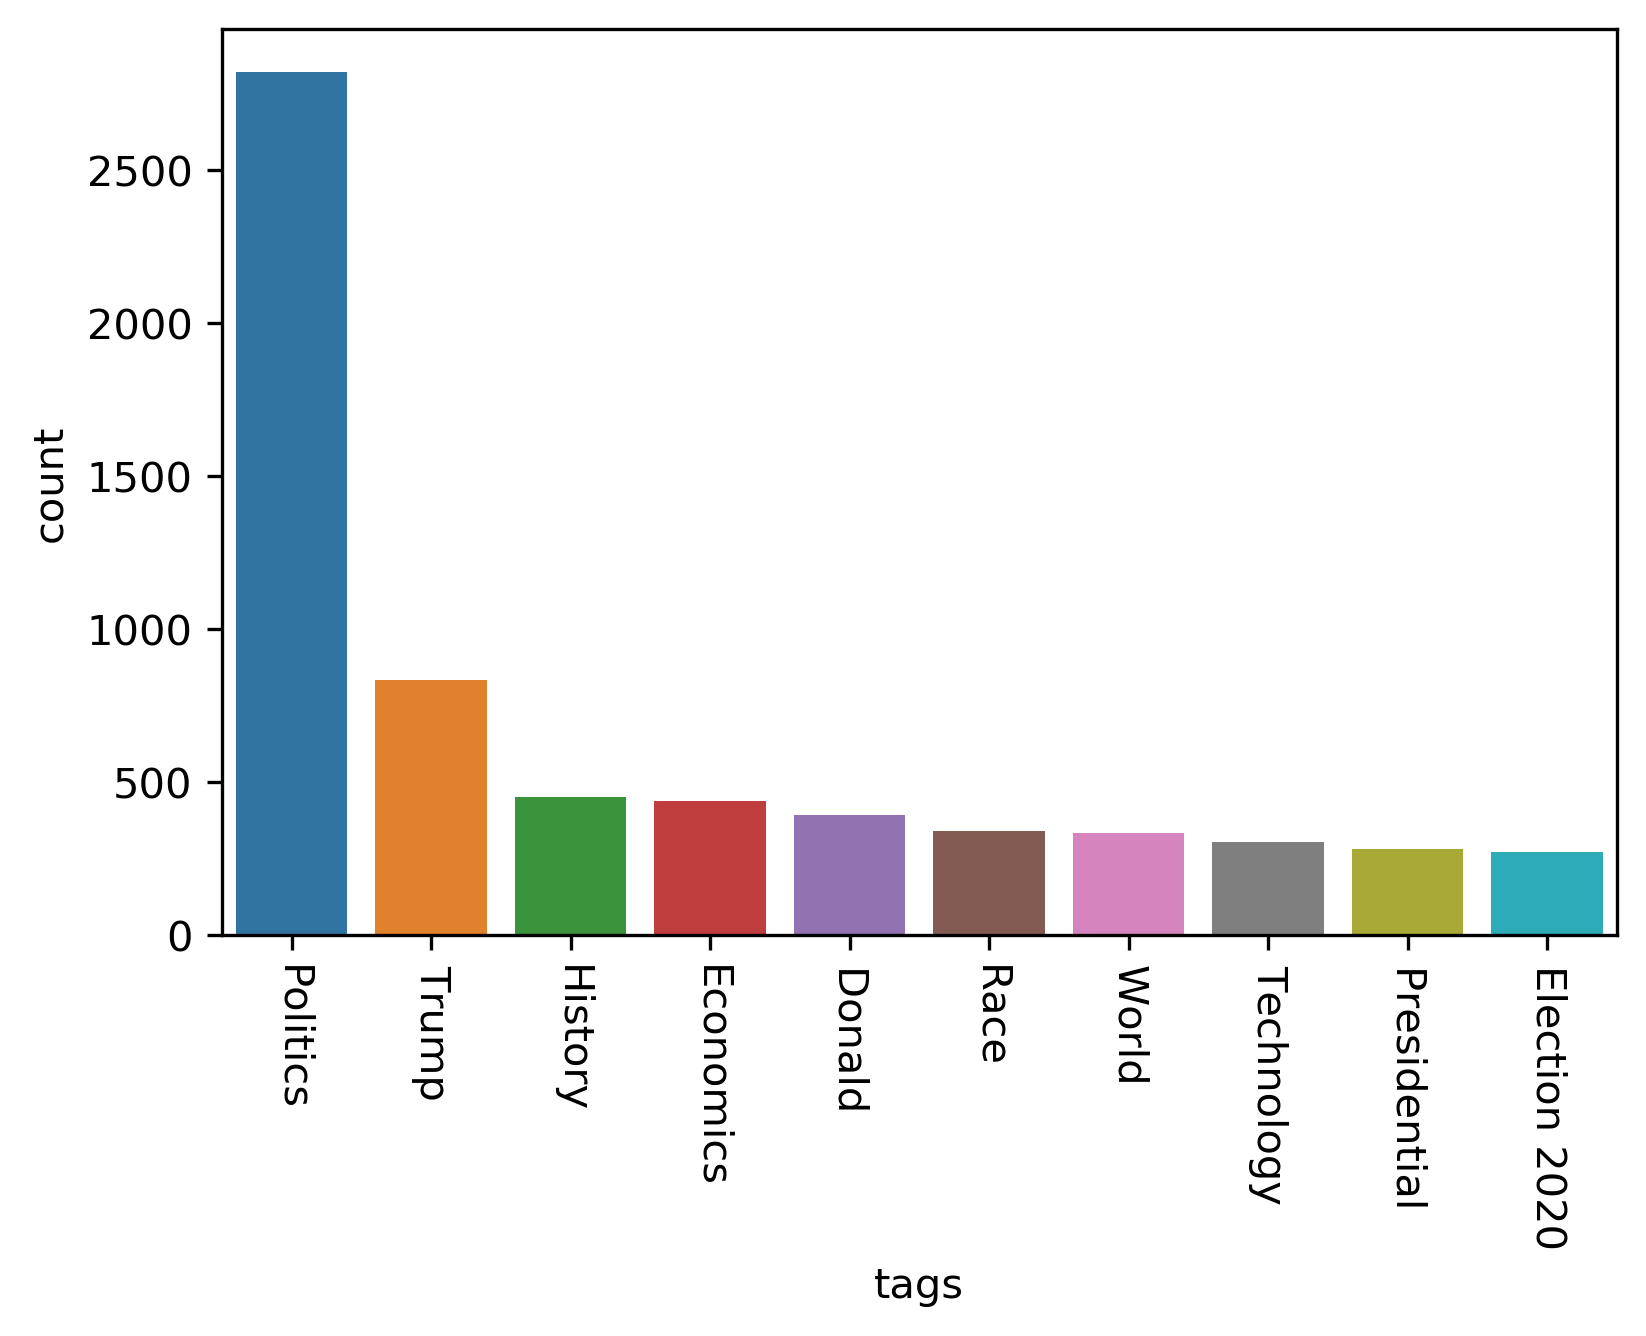

### Top 10 Tags in Sports
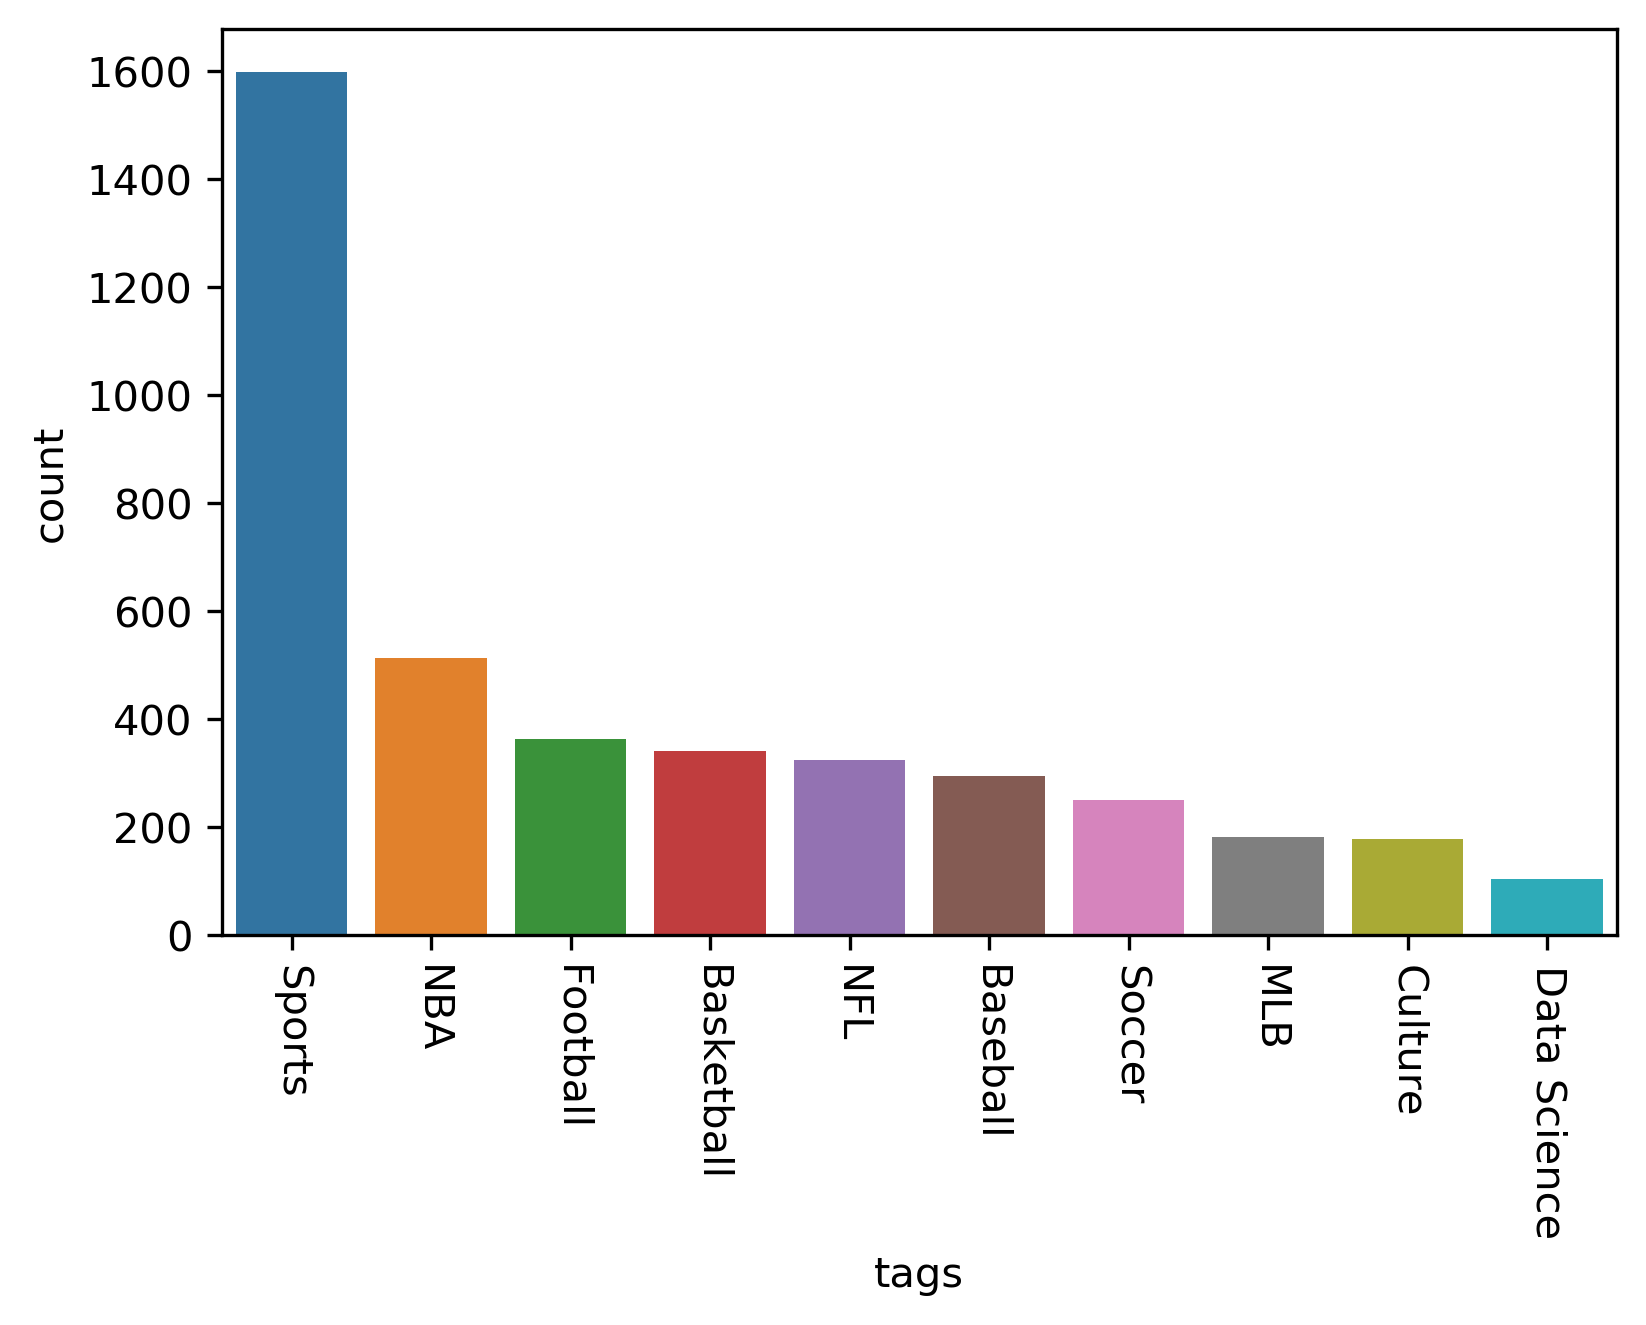

### Notable Observations

- Most common tag among all topics: the topic itself
- Business and Politics notable in Technology
- Personal and Story in Money
- Data Science tag in Sports

# Modeling - K nearest neighbors

Building a KNN Classifer model with the text data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Part 1: Breaking data into training and test sets

After cleaning the data and randomly sampling 2000 from each topic, we need to split our data in each of our 4 topics into train and test sets.   



In [ ]:
#Breaking our data up into training and test sets (80/20 split)
pd.options.mode.chained_assignment = None #surpress warning

#first, we need to add the labels
t["label"] = [0] * len(t)
s["label"] = [1] * len(s)
p["label"] = [2] * len(p)
m["label"] = [3] * len(m)

#store index of 80/20 split
ind_t = int(len(t) * 0.8)
ind_s = int(len(s) * 0.8)
ind_p = int(len(p) * 0.8)
ind_m = int(len(m) * 0.8)

#making the training set and test sets for each topic
t_train = t.iloc[:ind_t] 
s_train = s.iloc[:ind_s] 
p_train = p.iloc[:ind_p] 
m_train = t.iloc[:ind_m] 

t_test = t.iloc[ind_t:] 
s_test = s.iloc[ind_s:] 
p_test = p.iloc[ind_p:] 
m_test = t.iloc[ind_m:] 

#combining all the topics into train and test
ts = pd.concat([t_train, s_train], axis = 0)
pm = pd.concat([p_train, m_train], axis = 0)
train = pd.concat([ts, pm], axis = 0)

ts_test = pd.concat([t_test, s_test], axis = 0)
pm_test = pd.concat([p_test, m_test], axis = 0)
test = pd.concat([ts_test, pm_test], axis = 0)

#shuffling
train = train.sample(frac = 1, replace = False).reset_index(drop=True)
test = test.sample(frac = 1, replace = False).reset_index(drop=True)

#get X and Y data from the sets
X_train = train.text
Y_train = train.label

X_test = test.text
Y_test = test.label

In [ ]:
train.head()

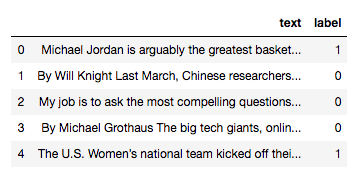

### Part 2: Scoring our words with TFIDFVectorizer

In [ ]:
#create the vector 
#focus on max_features as well
vector = tfidf(stop_words = "english", strip_accents = 'ascii', max_features = 50)

#fit the data onto our vector
vector.fit(X_train)

In [ ]:
#look at the vectorizer
print(vector.get_feature_names())

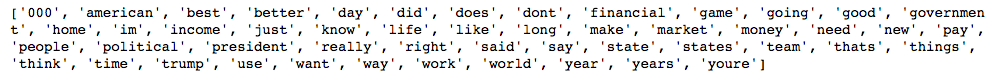

In [ ]:
#transforming the data, manipulating it based on the weights we 
#determined before by fitting our data 
train_transformed = vector.fit_transform(X_train)
test_transformed = vector.transform(X_test)

#splitting
train_test_split(train_transformed, Y_train)[0], train_test_split(train_transformed, Y_train)[1]

### Part 3: Hyperparameter Tuning and Cross Validation

Finding the best k by performing cross validation 

In [ ]:
#Cross Validation for k

# creating odd list of k for KNN (to prevent ties)
neighbors = list(range(1, 50, 2))
# empty list that will hold cv scores
cv_scores = []


# perform 10-fold cross validation
for k in neighbors:
    knearest = knn(n_neighbors = k)
    scores = cross_val_score(knearest, train_transformed, Y_train, cv = 10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# plot of accuracies for different k 
plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Cross Validation Results
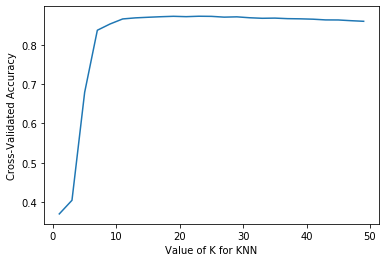

- peak starting from k > 10, slowly decreases around 30 

### More hyperparameter tuning: trying different k's


In [ ]:
#Trying different k values - which produces highest score
knn_scores = []

for i in range(1, 50, 2):
    knearest = knn(n_neighbors = i)
    knearest.fit(train_transformed, Y_train)
    
    knn_scores.append(knearest.score(test_transformed, Y_test))

knn_scores

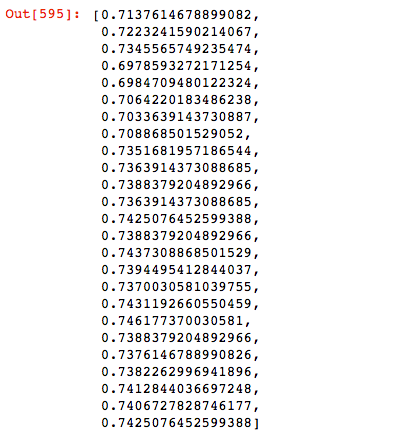

In [ ]:
best_k = (knn_scores.index(max(knn_scores)) + 1) * 2 - 1
best_k

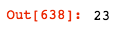

### Part 4: Create the Model with chosen k


In [ ]:
#create the KNN model
knearest = knn(n_neighbors = 23)

#fit the model with training data
knearest.fit(train_transformed, Y_train)


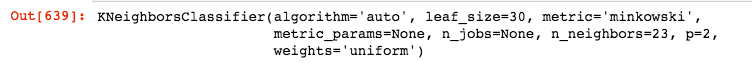

In [ ]:
knearest.score(test_transformed, Y_test)

### Confusion Matrix


In [ ]:
#get predictions 
predictions = dt.predict(test_final)

def normed_cm(real, predictions):
    """Majority of code from:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    to make a confusion matrix, given real labels and predicted labels"""
    
    #get the confusion matrix:
    cm = confusion_matrix(real, predictions)
    
    #normalized
    normed = []
    for row in np.arange(4):
         normed.append(cm[row]/sum(cm[row]))
    cm = np.array(normed)

    #axis and labels:
    fig, ax = plt.subplots()
    classes = ["politics", "money", "sports", "tech"]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title="Comparing Class Classification",
               ylabel='True label',
               xlabel='Predicted label');
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
normed_cm(test["label"],predictions)